In [16]:
import pandas as pd
import seaborn as sn

import matplotlib.pyplot as plt


In [17]:
%pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
cancer_data=pd.read_csv('Cancer_data.csv')
cancer_data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

Show the distribution of the variable "perimeter_mean" and explain your observations

In [19]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

array([[<Axes: title={'center': 'perimeter_mean'}>]], dtype=object)

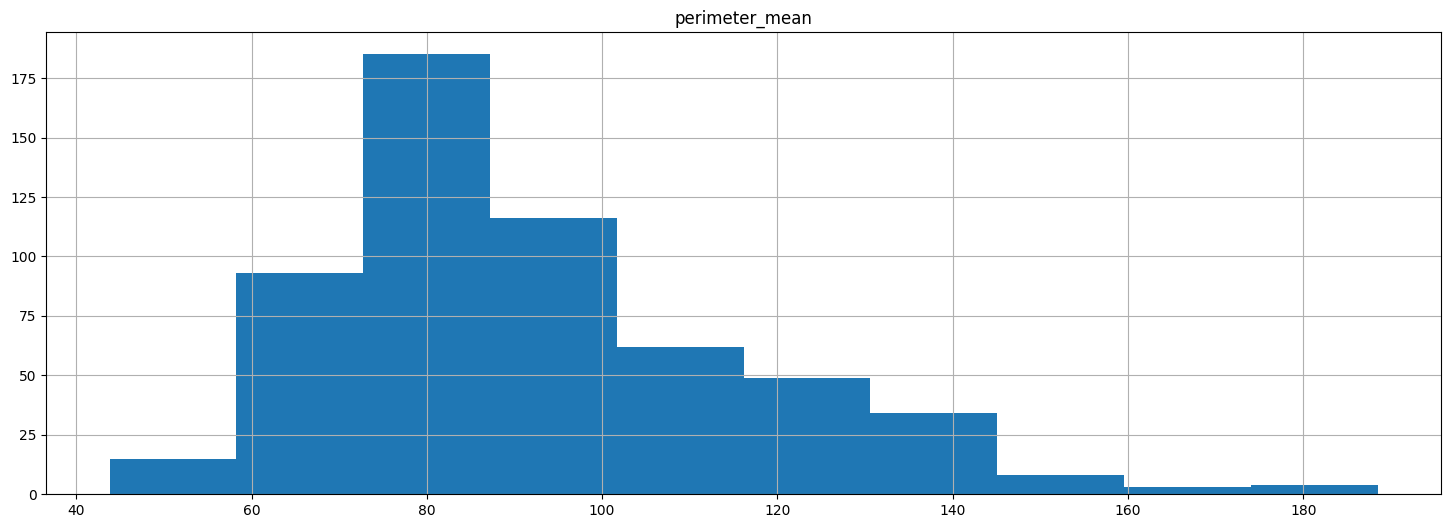

In [20]:
cancer_data.hist(['perimeter_mean'],figsize=(18,6))

In [21]:
cancer_data['perimeter_mean'].describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

### Explain

In [22]:
desc = cancer_data.perimeter_mean.describe()

Q1=desc[4]
Q3=desc[6]
IQR=Q3 - Q1 
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
outliers = cancer_data[cancer_data.perimeter_mean < lower_bound].perimeter_mean
print("Outliers: ",cancer_data[(cancer_data.perimeter_mean < lower_bound) | (cancer_data.perimeter_mean > upper_bound)].perimeter_mean.values)

Anything outside this range is an outlier: ( 31.775000000000013 , 147.49499999999998 )
Outliers:  [171.5 152.8 166.2 152.1 182.1 158.9 188.5 153.5 155.1 174.2 186.9 152.1
 165.5]


C:\Users\PEACE\AppData\Local\Temp\ipykernel_80716\2907030535.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q1=desc[4]
C:\Users\PEACE\AppData\Local\Temp\ipykernel_80716\2907030535.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q3=desc[6]


### 4. Effective size

In [23]:
print("Effective size:", cancer_data['perimeter_mean'].nunique())

Effective size: 522


### 5. Marginal probability

In [24]:
cancer_data['perimeter_mean'].describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

In [25]:
#Creative bins
bins = [0,20,40, 60, 80, 100, 120, 140, 160, 180, 200]
labels= ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140','140-160','160-180', '180-200']

#Creating a new column for the binned data 
cancer_data['perimeter_bin'] = pd.cut(cancer_data['perimeter_mean'], bins=bins, labels=labels, right=False)

#Calculate the Marginal Probabilities
perimeter_probabilities=cancer_data['perimeter_mean'].value_counts(normalize=True).sort_index()
perimeter_probabilities

perimeter_mean
43.79     0.001757
47.92     0.001757
47.98     0.001757
48.34     0.001757
51.71     0.001757
            ...   
171.50    0.001757
174.20    0.001757
182.10    0.001757
186.90    0.001757
188.50    0.001757
Name: proportion, Length: 522, dtype: float64

### 6. Probability of a tumour with a perimeter_mean less than or equal 20

In [26]:
#the probability of a tumor being less then or equal to 20
print("The probability of perimeter mean  being <= 20:",(cancer_data['perimeter_mean'] <= 20).mean())


The probability of perimeter mean  being <= 20: 0.0


### 7.What is the relationship between any two continuous variables in the cancer dataset?

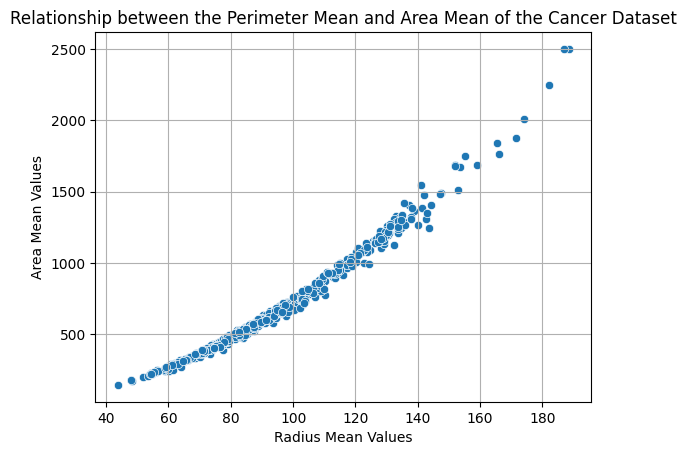

In [27]:
#the relationship between any two continuous variables in the cancer dataset
sn.scatterplot(x='perimeter_mean', y='area_mean', data=cancer_data)
plt.title('Relationship between the Perimeter Mean and Area Mean of the Cancer Dataset')
plt.xlabel('Radius Mean Values')
plt.ylabel('Area Mean Values')
plt.grid(True)
plt.show()